In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

'''

datetime - hourly date + timestamp  

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

'''

# Exploratory Data Analysis - EDA

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 12)

In [5]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Let's see what corrolations there are between columns

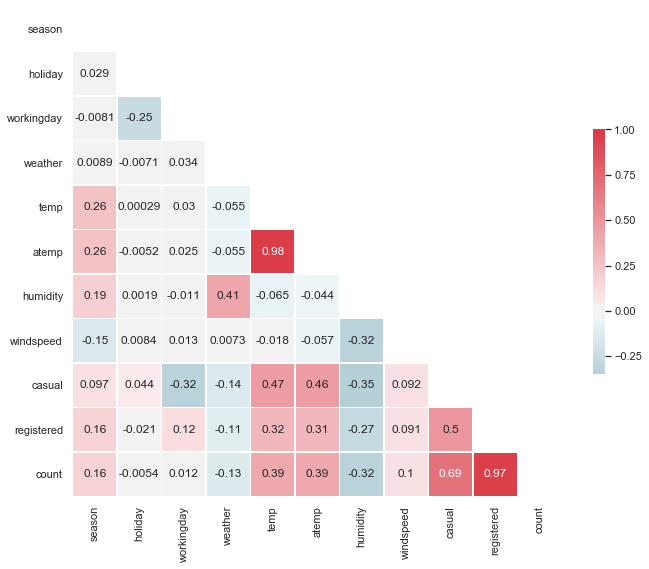

In [6]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

We want to the corrolation between each factor and the count column mainly

casual + registered users = count

temp and season have an interesting impact on count

more registered users on working days

more casual users on holidays

#### Let's create some visualizations

First we break down the datetime column

In [7]:
def SplitDateTime(df):
    df['date'] = df['datetime'].apply(lambda x: x.split()[0])
    df['hour'] = df['datetime'].apply(lambda x: x.split()[1]).apply(lambda x: x.split(':')[0])
    df.drop(columns='datetime', inplace=True)
    return

In [8]:
SplitDateTime(df)

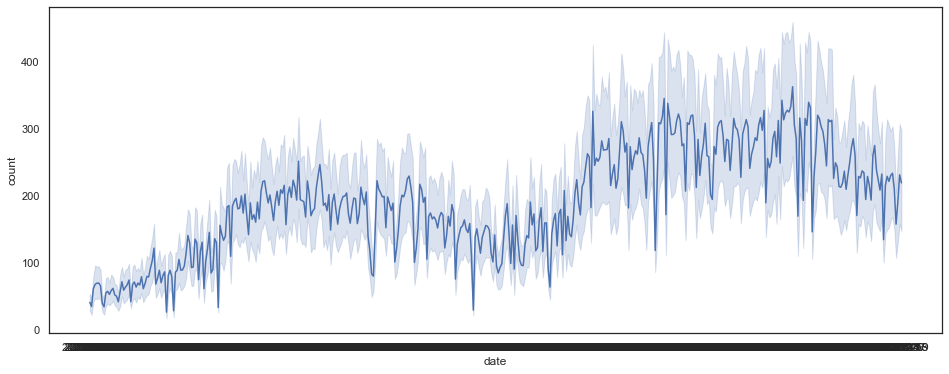

In [9]:
plt.figure(figsize=(16, 6))
sns.lineplot(x=df['date'], y=df['count'],
             data=df)

The data was recorded over 2 years. 
Looks like 2nd year had more clients

And that there were more clients over Summer / Autumn

In [10]:
def SplitMonthYear(df):
    df['month'] = df['date'].apply(lambda x: x.split('-')[1])
    df['year'] = df['date'].apply(lambda x: x.split('-')[0])
    return

In [11]:
SplitMonthYear(df)

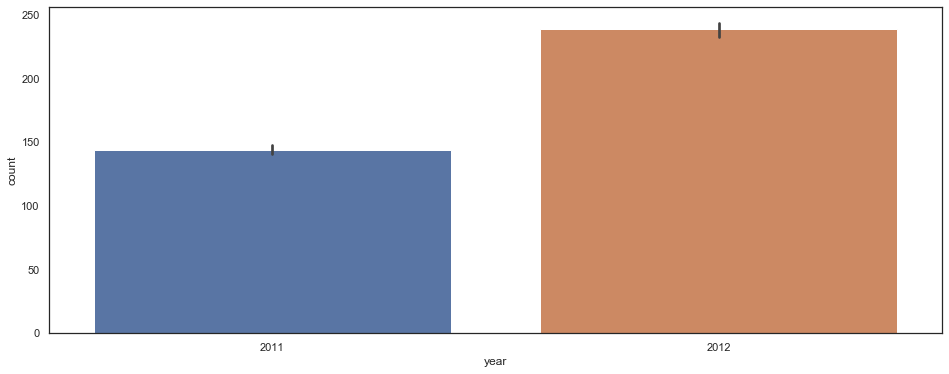

In [12]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df['year'], y=df['count'],
             data=df)

2012 had many more users

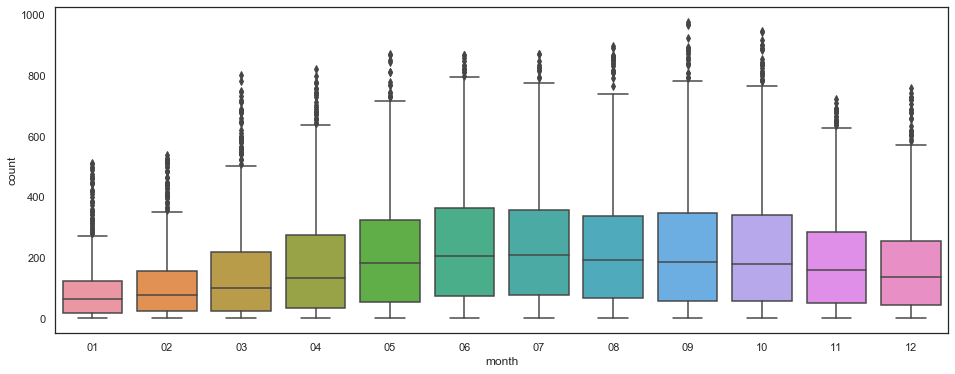

In [13]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['month'], y=df['count'],
             data=df)

Looks like most users over the summer months, but huge outliers over winter

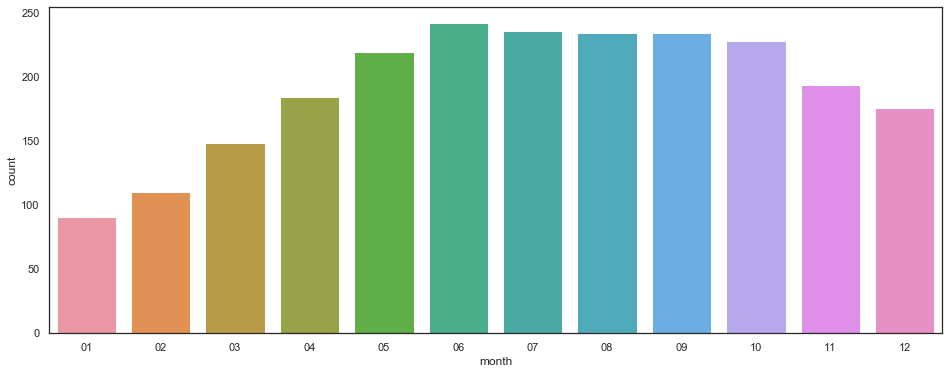

In [14]:
plt.figure(figsize=(16, 6))
dfmonth = pd.DataFrame(df.groupby("month")["count"].mean()).reset_index()
sns.barplot(x="month", y="count",
           data=dfmonth)

Averaged user count was actually higher over summer!

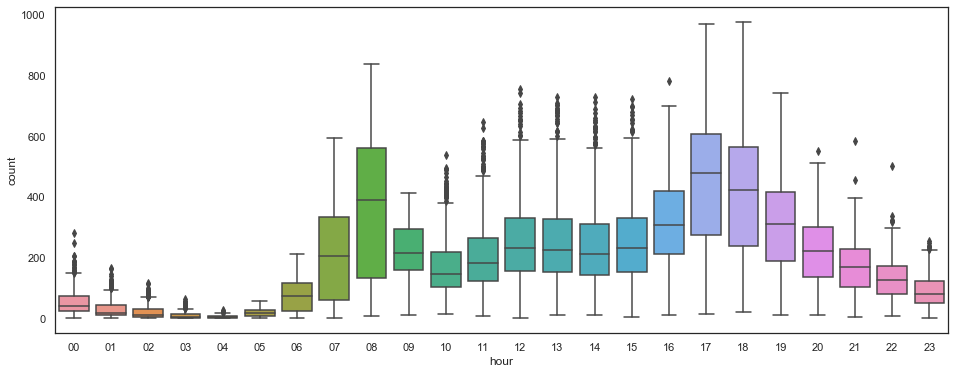

In [15]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['hour'], y=df['count'],
             data=df)

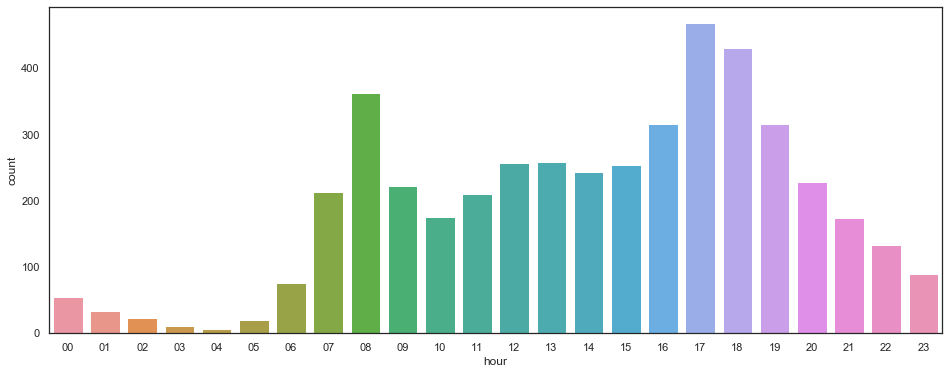

In [16]:
plt.figure(figsize=(16, 6))
dfhour = pd.DataFrame(df.groupby("hour")["count"].mean()).reset_index()
sns.barplot(x="hour", y="count",
           data=dfhour)

#seperate visualizations for working / non working days

Most hourly users are at 8am and 5pm. probably due to work / school

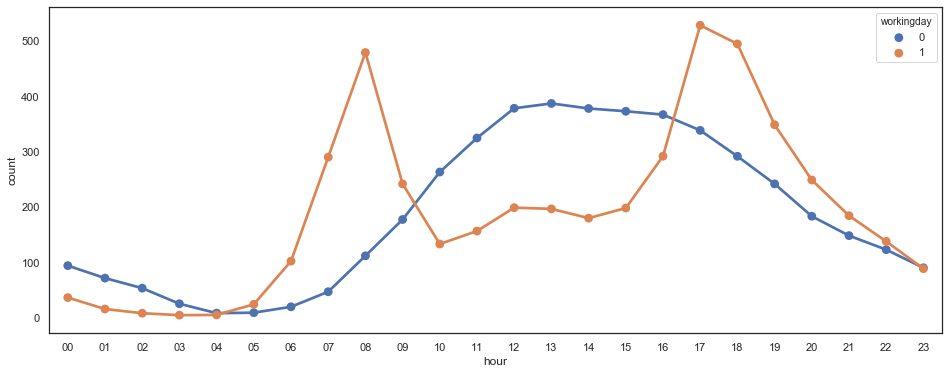

In [17]:

plt.figure(figsize=(16, 6))

dfhour = pd.DataFrame(df.groupby(["hour", "workingday"], sort=True)["count"].mean()).reset_index()
sns.pointplot(x=dfhour["hour"], y=dfhour["count"],hue=dfhour["workingday"], data=dfhour)

More users throughout the day on the weekends.

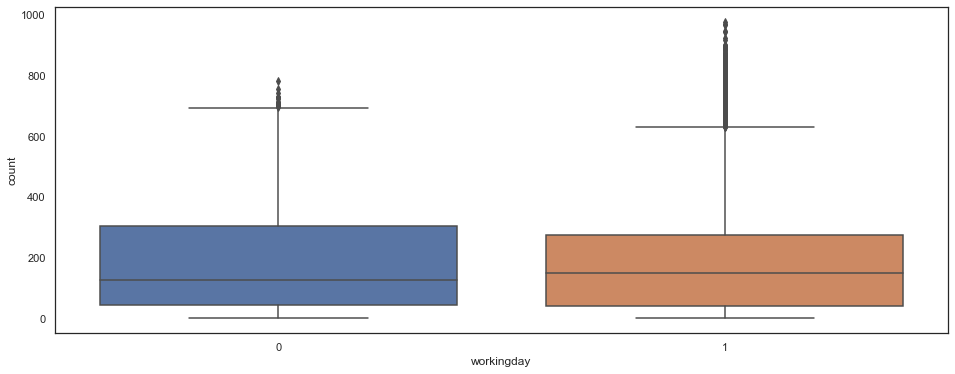

In [18]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['workingday'], y=df['count'],
             data=df)

User count for working days seems to have a lower average but more outliers

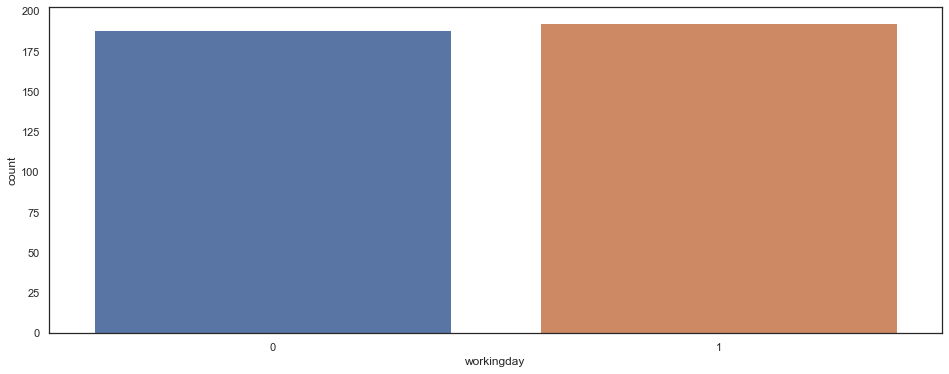

In [19]:
plt.figure(figsize=(16, 6))
dfworking = pd.DataFrame(df.groupby("workingday")["count"].mean()).reset_index()
sns.barplot(x="workingday", y="count",
           data=dfworking)

Average seems to be higher on non workingdays

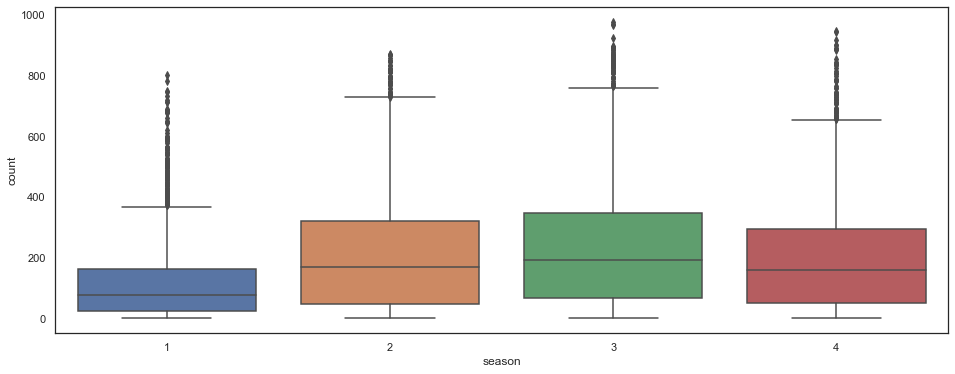

In [20]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['season'], y=df['count'],
             data=df)

Outliers are VERY far from the average

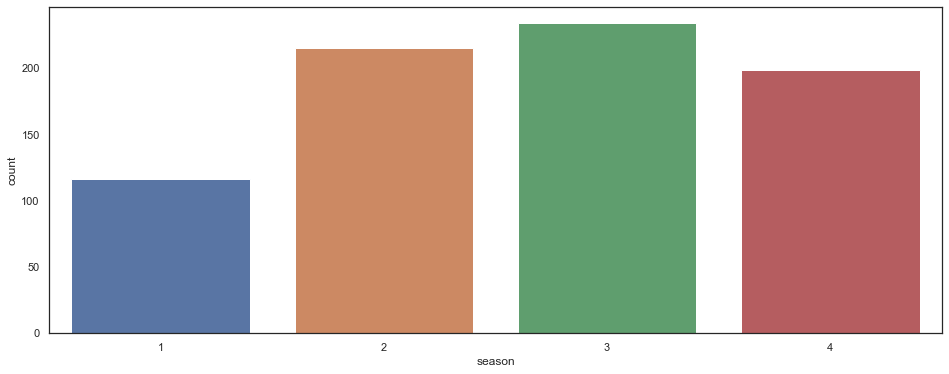

In [21]:
plt.figure(figsize=(16, 6))
dfseason = pd.DataFrame(df.groupby("season")["count"].mean()).reset_index()
sns.barplot(x="season", y="count",
           data=dfseason)

Average user count was higher during Autumn.
Spring has the least user count.

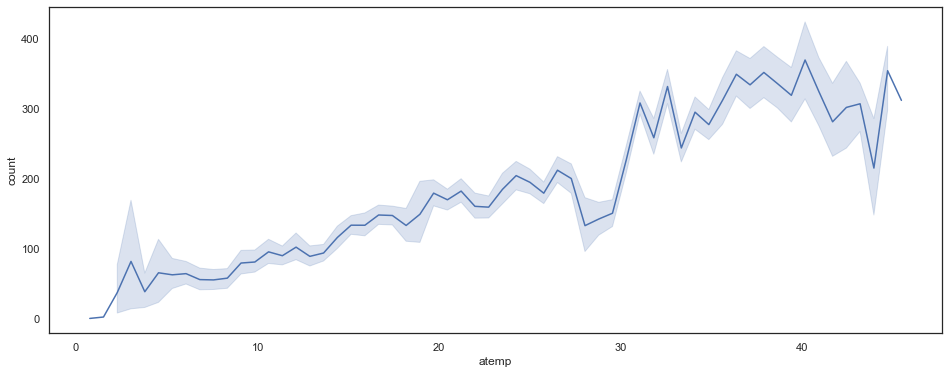

In [22]:
plt.figure(figsize=(16, 6))
sns.lineplot(x=df['atemp'], y=df['count'],
             data=df)

We can see from here there are many more users over the warmer hours of the day

In [23]:
variablelist = ["hour", "month", "season", "weather", "holiday", "workingday"]
for var in variablelist:
    df[var] = df[var].astype("category")

In [24]:
df.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
date            object
hour          category
month         category
year            object
dtype: object

In [25]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,01,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,01,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,01,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,01,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,01,2011


In [26]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,01,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,01,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,01,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,01,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,01,2011


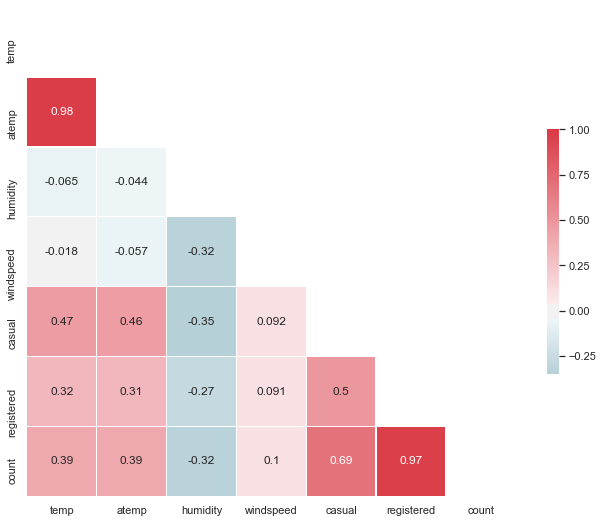

In [27]:
sns.set(style="white")

mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [28]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,01,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,01,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,01,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,01,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,01,2011


In [34]:
df.to_csv("train2.csv", encoding='utf-8', index=False)